Projet Analyse de données : partie "descriptive stats"

In [1]:
import pandas as pd
import numpy as np
import random as rd
import leaflet 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

%matplotlib inline

In [3]:
loading = pd.read_csv("data/velibLoading.csv")

Observons tout d'abord que les différentes moyennes des stations ne sont pas du tout homogène, et qu'il est donc, intéressant de regarder d'un peu plus près les différentes moyennes observées pour avoir une vision globale de l'impact des heures, jours et de la localisation des stations sur la comportement d'utilisation 

/tmp/ipykernel_3792/3305825233.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  loading_mean = pd.Series(loading.mean(axis=1))
/tmp/ipykernel_3792/3305825233.py:11: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.hlines(y = loading.mean().mean(), xmin=0, xmax=n_stations,
/usr/local/insa/anaconda/lib/python3.11/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


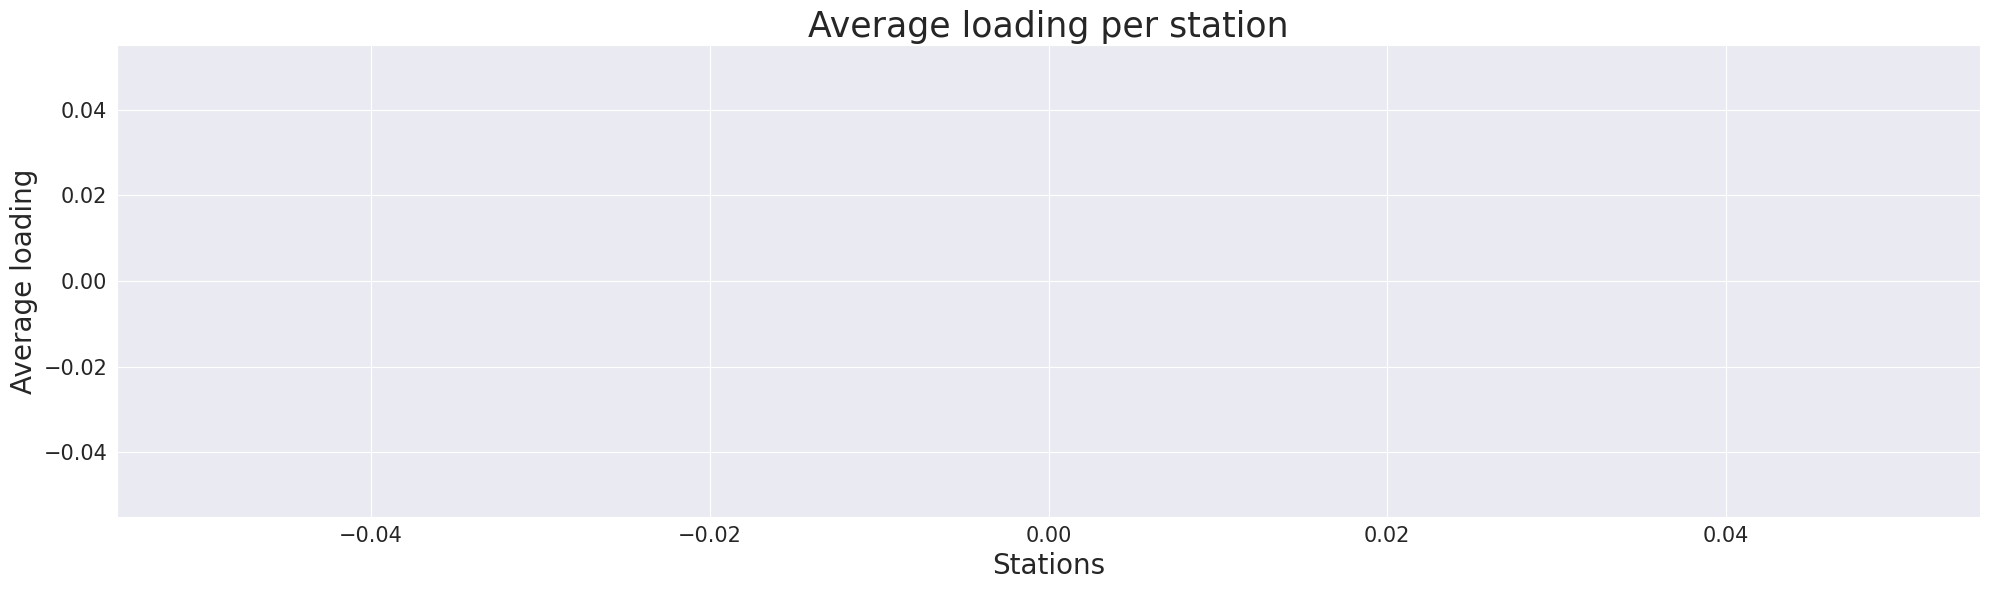

In [4]:
loading_mean = pd.Series(loading.mean(axis=1))
# %load solutions/Python/plot_mean_stations.py
n_stations = loading.shape[0]  # number of observed stations
stations   = np.arange(n_stations)

plt.figure(figsize = (20,6))

# --- #

plt.plot(loading_mean)
plt.hlines(y = loading.mean().mean(), xmin=0, xmax=n_stations, 
           colors = "OrangeRed", linewidth = 3)

# --- #

plt.xlabel('Stations', fontsize = 20)
plt.ylabel('Average loading', fontsize = 20)
plt.title("Average loading per station", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.tight_layout()
plt.show()

Les moyennes : 
    - Moyenne par heure par jour 
    - Station la + utilisée par jour
    - Station la - utilisée par jour 
    - Station la + utilisée par semaine 
    - Station la - utilisée par semaine 
    - heure la plus creuse d'utilisation (ie le taux est proche de 1 car tous les vélos sont à la station)
    - heure la + fréquentée (ie le taux est proche de 0)
    - jour le + fréquenté
    
    

- Moyenne par heure par jour 

- Taux d'utilisation en moyenne sur l'ensemble des heures, jours et stations, nous donne une idée globale sur l'utilisation parisienne des vélib

In [5]:
print('--- Average fill rate ---')
print(loading.mean().mean())
#on a la moyenne sur toutes les stations

# --- #
print('')

print('--- Least crowded station, on average ---')

--- Average fill rate ---
nan

--- Least crowded station, on average ---


/tmp/ipykernel_3792/3975741180.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(loading.mean().mean())


    - Station la + utilisée par semaine : ie de moyenne la plus faible

In [6]:
loading_mean = pd.Series(loading.mean(axis=1))
i = loading_mean.idxmin()
print('Average fill rate :', loading_mean[i])
print(coord.loc[i])

/tmp/ipykernel_3792/1256520302.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  loading_mean = pd.Series(loading.mean(axis=1))


KeyError: nan

    - Station la - utilisée par semaine : ie de moyenne la plus haute

In [ ]:
j = loading_mean.idxmax()
print('--- Fullest station, on average : ',loading_mean[j])
print(coord.loc[j])

Affichage des courbes des moyennes sur chaque jour : ce graphe permet de lire graphiquement le taux le + haut et e+le 

In [ ]:
mean_per_hour_per_day = loading.mean(axis = 0).to_numpy()
mean_per_hour_per_day = mean_per_hour_per_day.reshape((7, 24))

mean_per_hour = mean_per_hour_per_day.mean(axis=0)

# --- #

days = ["Monday", "Tuesday", "Wednesday","Thursday", "Friday", "Saturday", "Sunday"]
plt.figure(figsize = (15,10))

plt.plot(mean_per_hour_per_day.transpose())
plt.plot(mean_per_hour, color = "black", linewidth = 3)

plt.xlabel('Hourly loading, averaged over all stations', fontsize = 20)
plt.ylabel('Loading', fontsize = 20)
plt.legend(days + ['Weekly'])
plt.xticks(ticks = np.arange(0,24,4), labels=np.arange(0,24,4), fontsize = 15)
  
plt.tight_layout
plt.show()


#recup la moyenne la plus basse par jour 
mean_per_hour.idxmin()

#recup la moyenne la plus haute par jour 
mean_per_hour.idmax()

#Commentaire général: cela nous permet de connaître les heures d'influence globale de l'utilisation des vélos

On souhaite savoir, en moyenne, quel est le jour de la semaine, durant lequel les gens utilisent le + les vélos 
=> il faut récupérer les différentes moyennes par jour et prendre la plus faible (ie le - de vélos à la station)

In [ ]:
#Deux options:

#option1= 1:
days = ["Lun", "Mar", "Mer","Jeu", "Ven", "Sam", "Dim"]

for i in range(7):
    lundi = [c for c in loading.columns.tolist() if c.startswith(days[i])]
    loading[lundi].mean(axis=1)
    
# faire une liste avec les mots rep des colonnes puis les mettre dans une autre liste pour calculer la moyenne


#option 2:
cols_24 = loading.columns[:24]

# Calculer la moyenne des 24 premières colonnes pour chaque individu
mean_24 = df[cols_24].mean(axis=1)